# Problem 1

## A


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



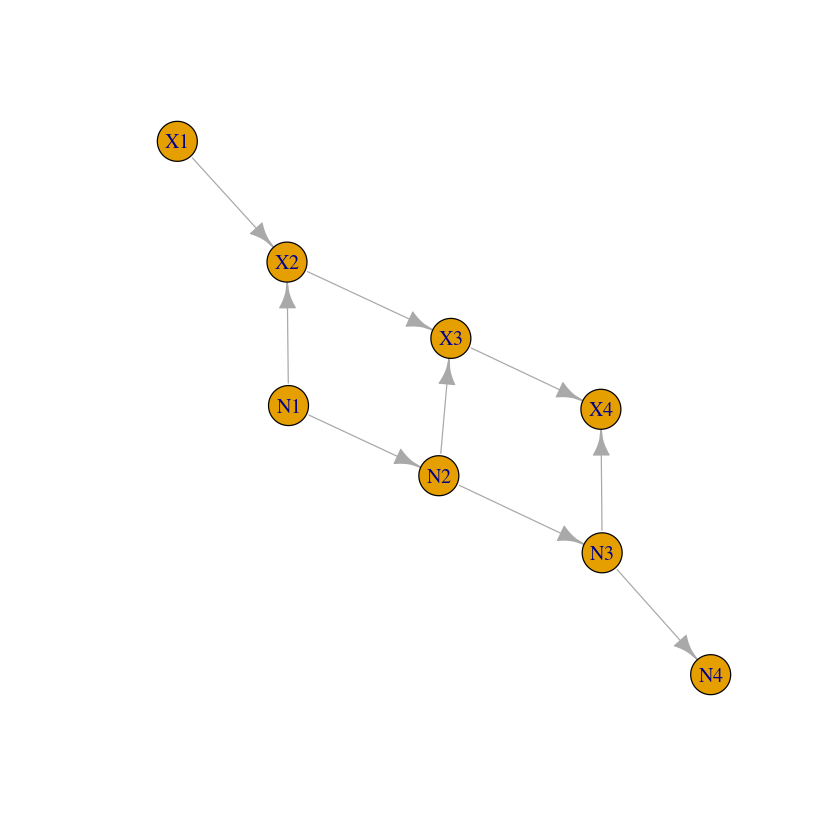

In [1]:
library(igraph)

adjmatrix = matrix(0, 8, 8)
colnames(adjmatrix)=c("X1", "X2", "X3", "X4", "N1", "N2", "N3", "N4")
rownames(adjmatrix)=c("X1", "X2", "X3", "X4", "N1", "N2", "N3", "N4")

adjmatrix["X3", "X4"] = 1
adjmatrix["X2", "X3"] = 1
adjmatrix["X1", "X2"] = 1

adjmatrix["N1", "N2"] = 1
adjmatrix["N2", "N3"] = 1
adjmatrix["N3", "N4"] = 1

adjmatrix["N3", "X4"] = 1
adjmatrix["N2", "X3"] = 1
adjmatrix["N1", "X2"] = 1

plot(graph_from_adjacency_matrix(adjmatrix))


## B

### i


$X_2 \perp \! \! \! \perp X_4 |N_3$ is false.

Using the ridiculously named Bayes ball method and its needlessly confusing bouncing metaphors, one can traverse the graph from $X_2$ to $X_4$ via $X_3$, so the two are not conditionally independent given $N_3$.

### ii

$N_2 \perp \! \! \! \perp X_2 |N_1$ is true.

Consider the triplet path $N_2 \rightarrow N_1 \rightarrow X_2$. Given that independence is conditioned on knowing $N_1$, this path is not viable.

Consider the triplet along $N_2 \rightarrow X_3 \rightarrow X_2$. Given that there are two incoming paths to $X_3$, one cannot reach $X_2$ from $N_2$ along this path.

For the same reason as above, one cannot reach $X_2$ from $N_2$ via $N_3 \rightarrow X_4$ --- two incoming paths to $X_4$ block the overall path.

Therefore, there is no path connecting $X_2$ and $N_2$ given $N_1$, so they are conditionally independent.

### iii

$X_1 \perp \! \! \! \perp X_4 | X_3$ is false.

Consider the path from: ($X_1 \rightarrow X_2$), ($X_2 \rightarrow X_3 \rightarrow N_2$), and ($N_2 \rightarrow N_3 \rightarrow X_4$). The first and third paths are valid simply enough, and the second is, too, because $X_3$ is specified. Therefore, there is a valid path from $X_1$ to $X_4$ given $X_3$, and conditional independence is not guaranteed.

## C

Using the law of total expectation:

\begin{align}
E[X_2] &= E[E[X_2|X_1,N_1]]
\end{align}

Given that $X_i|N_{i-1},X_{i-1} \sim Binomial\big(N_{i-1}, \frac{X_{i-1}}{N_{i-1}}\big)$:

\begin{align}
E\big[X_2|X_1,N_1]\big] &= n_{X_1}p_{X_1} \\
  &= N_1 \frac{X_1}{N_1} \\
  &= X_1
\end{align}

\begin{align}
\implies E\big[E[X_2|X_1,N_1]\big] &= E[X_1]
\end{align}

\begin{align}
\implies E[X_2] &= E[X_1] \\
  &= np
\end{align}

## D

In [2]:
set.seed(123)
reps = 1000
p = .5
n = 500

x1 = rbinom(reps, n, p)
n1 = rpois(reps, n)

x2 = rbinom(n1, n1, x1/n1)
n2 = rpois(n1, n1)

x3 = rbinom(n2, n2, x2/n2)
n3 = rpois(n2, n2)

x4 = rbinom(n3, n3, x3/n3)
n4 = rpois(n3, n3)

## E

In [3]:
mean(x2)

z = (mean(x2) - 250) / sqrt(var(x2)/length(x2))
z

[1] 250.446

[1] 0.8721447

Per the derivation in C, $E[X_2] = np = 500*.5 = 250$. 

The z-score of the statistic, assuming a normal distribution for $E[X_2]$ given the Central Limit Theorem, is $\sim 0.872$ and less than $\sim 1.64$ (if you are interested in 95\% intervals), meaning that one has little reason to believe the simulation result is inconsistent with the analytical solution.

## F

The simulation in D generated 1000 random variables $X_1$ and $X_4$, which are then used to generate the random Bernoulli variable $X_4 > X_1$.

According to the law of large numbers, the expectation of infinitely many replicates of $X_4 > X_1$ will yield the true value of the expectation of $X_4 > X_1$, which in the case of a Bernoulli random variable is simply $P(X_4 > X_1)$. 

\begin{align}
\overline{X} &= \lim_{N \rightarrow \infty} \frac{1}{N} \sum^{N}_{i=1} \delta\big(X_{4,i} > X_{1,i}\big) = \mu
\end{align}

$\delta$ is a reporter variable (0 or 1) for whether $X_{4,i} > X_{1,i}$, $N$ is the number of replicates, and $\mu$ is the true expectation.

In [4]:
samples = as.integer(x4 > x1)
mean(samples)

[1] 0.516

Using the Central Limit Theorem to assume that the sample mean is normally distributed. The z-score is:

\begin{align}
z &= \frac{\overline{x} - \mu}{SE} = \frac{\overline{x} - \mu}{\frac{std(x)}{\sqrt{n}}}\\
  &\approx \frac{.516 - .5}{\frac{.499993993957921}{\sqrt{1000}}} \\
  &\approx 1.01194100677442
\end{align}

The z-score is low and less than the $\sim$ 1.64 cutoff often used for 95\% confidence tests. At the very least, one cannot claim with much confidence that there is sufficient reason to believe that the simulated mean is inconsistent with the analytical solution $P(X_4 > X_1) = .5$.

In [5]:
z = (mean(samples) - .5) / sqrt(var(samples)/length(samples))
z

[1] 1.011941

## G

The distributions for $X_1$ and $X_4$ are both symmetric around $np$ because $p=.5$, but they each have different variances. Consider a new statistic $Z = X_4 - X_1$. Given the linearity of expectation, $Z$ is distributed around $np - np = 0$, and because the two component distributions are symmetric, so is $Z$.

If $X_4 > X_1$, then $Z > 0$. By symmetry, this means that $P(Z>0) = 0.5$.

# Problem 2

## A

$m_3(x_2)$ is obtained while eliminating $x_2$ and $x_3$ from the expression for $P(X_1)P(X_2|X_1)P(X_3|X_2)P(X_4|X_3)$. Note that in the following, $m_3(x_2)$ will depend on the value of $x_4$, but it will be omitted from the notation.

\begin{align}
\sum_{x_2} \sum_{x_3} P(X_1)P(X_2|X_1)P(X_3|X_2)P(X_4|X_3) &= 
  P(X_1) \sum_{x_2} P(X_2|X_1) \sum_{x_3} P(X_3|X_2) P(X_4|X_3)
\end{align}

Summing over $x_3$ yields $m_3(x_2)$:
\begin{align}
m_3(x_2) &= \sum_{x_3} P(X_3|X_2) P(X_4|X_3) \\
\end{align}

Again, the dependency on $x_4$ is omitted given that $x_4=2$ was specified in the prompt.

Adding terms from the distributions for $X_3|X_2$ and $X_4|X_3$ (given $x_4 = 2$) for an explicit solution yields:
\begin{align}
m_3(x_2) &= \sum_{x_3} P(X_3|X_2) P(X_4|X_3) \\
  &= \sum_{x_3} {2 \choose x_3} \big(\frac{x_2}{2}\big)^{x_3} \big(1 - \frac{x_2}{2}\big)^{2 - x_3} {2 \choose 2} \big(\frac{x_3}{2}\big)^{2} \big(1 - \frac{x_3}{2}\big)^{2 - 2} \\
  &= \sum_{x_3} {2 \choose x_3} \big(\frac{x_2}{2}\big)^{x_3} \big(1 - \frac{x_2}{2}\big)^{2 - x_3} \big(\frac{x_3}{2}\big)^{2} \\
  &= {2 \choose 0} \big(\frac{x_2}{2}\big)^{0} \big(1 - \frac{x_2}{2}\big)^{2 - 0} \big(\frac{0}{2}\big)^{2} + {2 \choose 1} \big(\frac{x_2}{2}\big)^{1} \big(1 - \frac{x_2}{2}\big)^{2 - 1} \big(\frac{1}{2}\big)^{2} + {2 \choose 2} \big(\frac{x_2}{2}\big)^{2} \big(1 - \frac{x_2}{2}\big)^{2 - 2} \big(\frac{2}{2}\big)^{2} \\
  &= 2 \big(\frac{x_2}{2}\big) \big(1 - \frac{x_2}{2}\big) \big(\frac{1}{2}\big)^{2} + \big(\frac{x_2}{2}\big)^{2} \\
  &= \frac{1}{4} x_2 \big(1 - \frac{x_2}{2}\big) + \big(\frac{x_2^2}{4}\big) \\
  &= \frac{1}{4} \big(x_2 + \frac{x_2^2}{2} \big)
\end{align}

## B

At this point:

\begin{align}
\sum_{x_2} \sum_{x_3} P(X_1)P(X_2|X_1)P(X_3|X_2)P(X_4|X_3) 
  &= P(X_1) \sum_{x_2} P(X_2|X_1) \sum_{x_3} P(X_3|X_2) P(X_4|X_3) \\
  &= P(X_1) \sum_{x_2} P(X_2|X_1) m_3(x_2) \\
  &= P(X_1) \sum_{x_2} P(X_2|X_1) \frac{1}{4} \big(x_2 + \frac{x_2^2}{2} \big)
\end{align}

For the solution of $P(X_1 = 0, X_4 = 2)$, continue the summation over $X_2$ terms:
\begin{align}
P(X_1) \sum_{x_2} P(X_2|X_1) \frac{1}{4} \big(x_2 + \frac{x_2^2}{2} \big) &= {2 \choose 0}(.1)^0(.9)^2 \Big( \sum_{x_2} { 2 \choose x_2} \big(\frac{0}{2}\big)^{x_2} \big(1-\frac{0}{2}\big)^{2-x_2} \frac{1}{4} \big(x_2 + \frac{x_2^2}{2} \big) \Big) \\
  &= .9^2 \Big( \sum_{x_2} { 2 \choose x_2} 0^{x_2} 1^{2-x_2} \frac{1}{4} \big(x_2 + \frac{x_2^2}{2} \big) \Big) \\
  &= 0 \\
\implies P(X_1 = 0, X_4 = 2) &= 0
\end{align}

The probability at $X_1 = 1$ and $X_4 = 2$ is:
\begin{align}
P(X_1) \sum_{x_2} P(X_2|X_1) \frac{1}{4} \big(x_2 + \frac{x_2^2}{2} \big) &= {2 \choose 1}(.1)^1(.9)^1 \Big( \sum_{x_2} { 2 \choose x_2} \big(\frac{1}{2}\big)^{x_2} \big(1-\frac{1}{2}\big)^{2-x_2} \frac{1}{4} \big(x_2 + \frac{x_2^2}{2} \big) \Big) \\
  &= 0.18 \Big( { 2 \choose 0} \big(\frac{1}{2}\big)^{0} \big(1-\frac{1}{2}\big)^{2-0} \frac{1}{4} \big(0 + \frac{0^2}{2} \big) \\ &+ { 2 \choose 1} \big(\frac{1}{2}\big)^{1} \big(1-\frac{1}{2}\big)^{2-1} \frac{1}{4} \big(1 + \frac{1^2}{2} \big) \\ &+ { 2 \choose 2} \big(\frac{1}{2}\big)^{2} \big(1-\frac{1}{2}\big)^{2-2} \frac{1}{4} \big(2 + \frac{2^2}{2} \big) \Big) \\
  &= 0.18 \Big( \big(\frac{1}{2}\big)^2 \frac{1}{4}(0) + 2 \big(\frac{1}{2}\big)\big(\frac{1}{2}\big) \frac{1}{4} \big(1 + \frac{1}{2} \big) + \big(\frac{1}{2}\big)^{2} \frac{1}{4} \big(2 + 2 \big) \Big) \\
  &= 0.18 \Big( 2 \frac{1}{4} \frac{1}{4} \frac{3}{2} + \frac{1}{4} \frac{1}{4} 4 \Big) \\
  &= 0.18 \Big( \frac{3}{16} + \frac{4}{16} \Big) \\
  &= 0.18 \frac{7}{16} \\
  &= 0.07875 \\
\implies P(X_1 = 1, X_4 = 2) &= 0.07875
\end{align}